<a href="https://colab.research.google.com/github/heidaralavi/Fetch-daily-product/blob/main/Data%20Gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/heidaralavi/Fetch-daily-product.git

Cloning into 'Fetch-daily-product'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 107 (delta 34), reused 75 (delta 12), pack-reused 0
Receiving objects: 100% (107/107), 22.82 MiB | 30.39 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
import os
from typing_extensions import Concatenate
from os import walk
mypaths= ['/content/Fetch-daily-product/1400','/content/Fetch-daily-product/1399','/content/Fetch-daily-product/1398']
myfiles=[]
for mypath in mypaths:
  for root, dirs, files in os.walk(mypath):
    for f in files:
      myfiles.append(root+'/'+f)
      #break #only one loop needed
myfiles,len(myfiles)

(['/content/Fetch-daily-product/1400/5-Mordad.xlsx',
  '/content/Fetch-daily-product/1400/11-Bahman.xlsx',
  '/content/Fetch-daily-product/1400/10-Dey.xlsx',
  '/content/Fetch-daily-product/1400/9-Azar.xlsx',
  '/content/Fetch-daily-product/1400/2-Ordibehesht.xlsx',
  '/content/Fetch-daily-product/1400/12-Esfand.xlsx',
  '/content/Fetch-daily-product/1400/8-Aban.xlsx',
  '/content/Fetch-daily-product/1400/7-Mehr.xlsx',
  '/content/Fetch-daily-product/1400/1-Farvardin.xlsx',
  '/content/Fetch-daily-product/1400/3-Khordad.xlsx',
  '/content/Fetch-daily-product/1400/6-Shahrivar.xlsx',
  '/content/Fetch-daily-product/1400/4-Tir.xlsx',
  '/content/Fetch-daily-product/1399/5-Mordad.xlsx',
  '/content/Fetch-daily-product/1399/11-Bahman.xlsx',
  '/content/Fetch-daily-product/1399/10-Dey.xlsx',
  '/content/Fetch-daily-product/1399/9-Azar.xlsx',
  '/content/Fetch-daily-product/1399/2-Ordibehesht.xlsx',
  '/content/Fetch-daily-product/1399/12-Esfand.xlsx',
  '/content/Fetch-daily-product/1399/8-A

In [4]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [5]:
product =[]
for f in myfiles:
    xl = pd.ExcelFile(f)
    sheet_names=xl.sheet_names
    for sheet_name in sheet_names:
        df= pd.read_excel(f, sheet_name=sheet_name , header = None)
        df = trim_all_columns(df)
        date_row,date_col=np.where(df.values == 'تاریخ گزارش:')
        row,col = np.where(df.values == 'روز')
        tolid_row,tolid_col = np.where(df.values == 'میزان تولید واقعي')
        filter_row,filter_col = np.where(df.values == 'ميزان توليد فيلتر ديسكها')
        grate_feed_row,grate_feed_col = np.where(df.values == 'ميزان فيد ورودي به تراولينگ گريت')
        G_row,G_col = np.where(df.values == 'ميزان مواد ريزشي از تراولينگ به سمت ديسكها (920BC3)')
        #print([df.values[date_row,date_col+4][0],df.values[date_row,date_col+2][0],df.values[tolid_row,col][0],df.values[filter_row,col][0]])
        product.append([df.values[date_row,date_col+4][0],df.values[date_row,date_col+2][0],
                        df.values[tolid_row,col][0],df.values[filter_row,col][0],
                        df.values[grate_feed_row,col][0],df.values[G_row,col][0],])
        #break

In [6]:
df_final=pd.DataFrame(product,columns=['date','jdate','M+L+E(ton/day)','H(ton/day)','A(ton/day)','G(ton/day)'])

In [8]:
df_final = df_final.sort_values(by="date")
df_final.reset_index(inplace=True,drop=True)

In [9]:
df_final

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
0,2019-03-21,1398/01/01,11131,860.78,12131.0,551.00
1,2019-03-22,1398/01/02,11514,789.73,12385.3,543.00
2,2019-03-23,1398/01/03,11849,854.57,12415.0,530.00
3,2019-03-24,1398/01/04,11722,862.67,12278.4,524.00
4,2019-03-25,1398/01/05,9127,585.07,9948.0,385.00
...,...,...,...,...,...,...
1079,2022-03-04,1400/12/13,13151,819.96,14243.0,164.00
1080,2022-03-05,1400/12/14,13069,755.44,13928.2,156.00
1081,2022-03-06,1400/12/15,13089,265.12,13950.7,162.00
1082,2022-03-07,1400/12/16,13148,480.42,13935.3,154.00


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1084 non-null   datetime64[ns]
 1   jdate           1084 non-null   object        
 2   M+L+E(ton/day)  1084 non-null   int64         
 3   H(ton/day)      1084 non-null   float64       
 4   A(ton/day)      1084 non-null   float64       
 5   G(ton/day)      1084 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 50.9+ KB


In [11]:
df_final[df_final.values == '1400/07/26']

,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day)
942,2021-10-18,1400/07/26,13003,959.42,13716.5,180.0


In [13]:
df_final.to_excel('final_data.xlsx')

In [14]:
ddf=df_final[df_final['M+L+E(ton/day)']>10000]
landa=(ddf['A(ton/day)']-ddf['H(ton/day)']-ddf['G(ton/day)'])/(ddf['M+L+E(ton/day)'])
ddf['landa']=landa
ddf[ddf.values == '1400/07/26']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,jdate,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day),landa
942,2021-10-18,1400/07/26,13003,959.42,13716.5,180.0,0.967244


In [15]:
ddf.describe()

,M+L+E(ton/day),H(ton/day),A(ton/day),G(ton/day),landa
count,852.000000,852.000000,852.000000,852.000000,852.000000
mean,11852.606808,772.782770,12814.701209,482.596596,0.975378
std,738.385369,272.320933,774.100143,244.038080,0.038368
min,10003.000000,0.000000,6988.100000,0.000000,0.585251
25%,11445.750000,604.290000,12453.300000,198.000000,0.953237
50%,11795.000000,829.505000,12871.875000,519.000000,0.972964
75%,12228.000000,964.155000,13235.250000,678.030000,0.996157
max,13965.000000,1485.540000,17675.000000,950.030000,1.292051


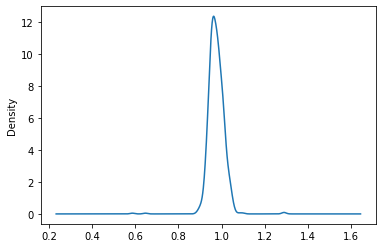

In [16]:
ddf['landa'].plot(kind='kde')